In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

def list_SIMS(directory):
    csv_files = set()
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv') and not file.startswith('rp'):
                csv_files.add(os.path.join(root, file))
    return list(csv_files)

def list_MNIST(directory):
    csv_files = set()
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv') and file.startswith('rp'):
                csv_files.add(os.path.join(root, file))
    return list(csv_files)


0 out/mnist/2025-01-21_14:45/rp_additive.csv
1 out/mnist/2025-01-21_14:45/rp_blurred.csv
2 out/mnist/2025-01-27_17-55/rp_additive.csv
3 out/mnist/2025-01-27_17-55/rp_blurred.csv
4 out/mnist/2025-01-27_18-10/rp_blurred.csv
5 out/mnist/2025-01-27_18-10/rp_additive.csv


------

# sims

In [7]:

files = list_SIMS('out')
for i, file in enumerate(files):
    print(i, file)

0 out/MODEL_3/mu : 0.15, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-24_18:52.csv
1 out/MODEL_2/num_spikes : 10, spike_value : 3, /2025-01-23_12:15.csv
2 out/MODEL_3/mu : 0.2, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-23_12:22.csv
3 out/MODEL_3/mu : 0.15, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-24_19:05.csv
4 out/MODEL_1/mu : 0.3, numDiffLocs : 20, /2025-01-25_01:16.csv
5 out/MODEL_1/mu : 0.3, numDiffLocs : 20, /2025-01-25_01:15.csv
6 out/MODEL_1/mu : 0.3, numDiffLocs : 20, /2025-01-24_18:54.csv
7 out/MODEL_2/num_spikes : 10, spike_value : 7, /2025-01-21_20:02.csv
8 out/MODEL_1/mu : 0.3, numDiffLocs : 20, /2025-01-24_19:05.csv
9 out/MODEL_1/mu : 0.25, numDiffLocs : 20, /2025-01-22_19:10.csv
10 out/MODEL_2/num_spikes : 10, spike_value : 3, /2025-01-23_12:21.csv
11 out/MODEL_3/mu : 0.15, spike_value : 3, numDiffLocs : 20, num_spikes : 10, /2025-01-24_18:57.csv
12 out/MODEL_2/num_spikes : 10, spike_value : 5, /2025-01-24_18:52.csv
1

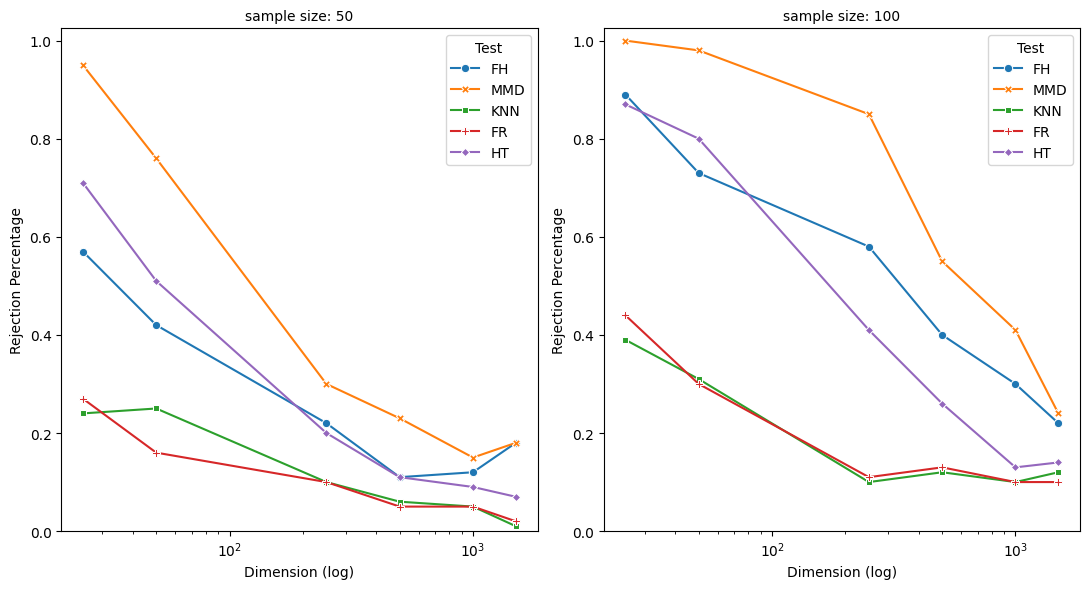

In [5]:

file = files[-1]

df = pd.read_csv(file)
ns = df['sample size'].unique()

fig, axs = plt.subplots(figsize=(5.5*len(ns) , 6), ncols = len(ns))

for n,ax in zip(ns,axs):
    sns.lineplot(data=df[df['sample size'] == n], x="dimension",  y="percent of rejections", hue="test",style="test", markers=True, dashes=False, ax=ax)
    ax.set_xlabel("Dimension (log)")
    ax.set_ylabel("Rejection Percentage")
    ax.set_title('sample size: {}'.format( n), fontsize = 10)
    ax.legend(title="Test")
    ax.set_ylim(0, 1.025)
    ax.set_xscale('log') 
    plt.tight_layout()
fig.savefig(f'figures/sims_{file.split("/")[1]}.png')


# mnist

In [29]:

files = list_MNIST('out')
files.sort(key=lambda x: x.split('/')[2])
tss = list(set([file.split('/')[2] for file in files]))

for i, ts in enumerate(tss):
    print(i, ts)


0 2025-01-21_14:45


In [27]:
ts = tss[2]

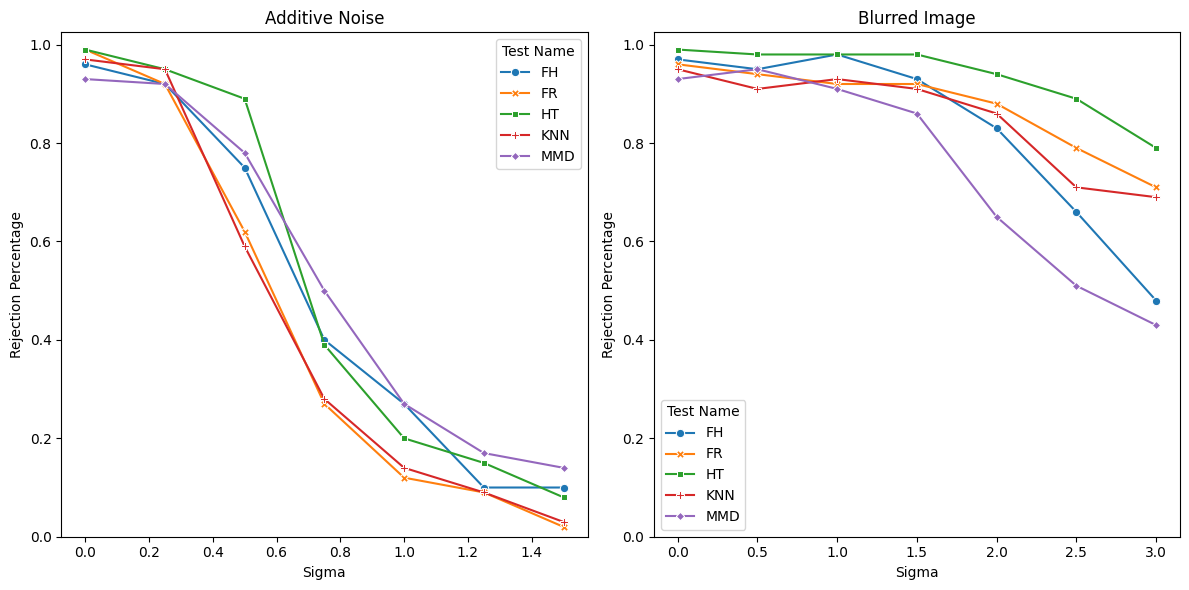

In [28]:
fig, [axl, axr] = plt.subplots(figsize=(12, 6), ncols=2)
df_additive = pd.read_csv(f'out/mnist/{ts}/rp_additive.csv')
df_blurred = pd.read_csv(f'out/mnist/{ts}/rp_blurred.csv')
for ax, df, title in zip([axl, axr], [df_additive, df_blurred], ['Additive Noise', 'Blurred Image']):
    sns.lineplot(
        data=df,
        x="sigma",
        y="value",
        hue="test_name",
        style="test_name",
        markers=True,
        dashes=False,
        ax=ax
    )
    ax.set_xlabel("Sigma")
    ax.set_ylabel("Rejection Percentage")
    ax.set_title(title)
    ax.legend(title="Test Name")
    # ax.set_aspect('equal', adjustable='datalim')
    ax.set_ylim(0, 1.025)
plt.tight_layout()
fig.savefig(f'figures/mnist_rp_additive_blurred.png')